In [1]:
#pip install matplotlib
#pip install seaborn
#pip install openpyxl
#pip install plotly==5.8.0
# voir black pour code formatter

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import datasets
import plotly.express as px



<br/>

# Prepare dataset

## Download our dataset from an xlsx and drop Nan values

Our dataset gives average intake per person per day in UK households from food and drinks

In [3]:
filename='UKInt-27Jan2022.xlsx'

df = pd.read_excel(filename,sheet_name='Total_intakes_average')
df=df.dropna()  #we remove lines with NaN values
df = df.drop(['chg since 201617','chg since 201819'],axis = 1)

df1 = pd.read_excel(filename,sheet_name='Total_intakes_average')
df1 = df1.dropna()

df

Description Units      2001-02      2002-03  \
0                                      Energy  kcal  2408.885538  2409.742704   
2   Energy from all sources excluding alcohol  kcal  2330.453091  2332.465121   
3                                     Protein     g    82.080089    82.240302   
4                                         Fat     g    99.346899    98.690119   
6                                   Saturates     g    38.264752    37.970383   
7                            Mono-unsaturates     g    36.410992    36.203574   
8                            Poly-unsaturates     g    17.919982    17.722391   
9                                 Cholesterol    mg   279.146933   277.621612   
10                           Carbohydrate (b)     g   295.513766   297.452890   
11                               Total sugars     g   136.167596   137.343375   
12                  Non-milk extrinsic sugars     g    91.764677    92.735369   
13                                     Starch     g   159.146574   159.887685   
14                                  Fibre (c)     g    15.282107    15.380021   
15                                    Alcohol     g    11.204635    11.039655   
16                                    Calcium    mg  1025.343761  1024.588992   
17                                       Iron    mg    12.346000    12.479411   
18                                       Zinc    mg     9.733966     9.764227   
19                                  Magnesium    mg   294.715880   294.822095   
20                                 Sodium (d)     g     3.245256     3.189970   
21                                  Potassium     g     3.347560     3.329822   
22                                    Thiamin    mg     1.734561     1.744098   
23                                 Riboflavin    mg     2.037156     2.034567   
24                          Niacin Equivalent    mg    35.870268    35.908146   
25                                 Vitamin B6    mg     2.627373     2.601558   
26                                Vitamin B12    μg     6.583420     6.537323   
27                                     Folate    μg   308.361212   309.009430   
28                                  Vitamin C    mg    78.515668    78.723900   
30                                    Retinol    μg   564.871957   556.624086   
31                                   Carotene    μg  2241.206889  2167.334133   
32                         Retinol equivalent    μg   938.089655   925.344258   
33                                  Vitamin D    μg     3.664599     3.651033   
34                                  Vitamin E    mg    13.359131    13.160152   

        2003-04      2004-05      2005-06         2006         2007  \
0   2381.275471  2337.890448  2361.822725  2350.549626  2320.463918   
2   2301.944319  2261.967563  2287.255263  2276.277538  2247.294916   
3     81.428941    80.721764    81.754742    81.254555    80.386091   
4     97.956057    95.920043    96.890858    97.358754    95.618132   
6     37.789043    36.882086    37.204062    37.203295    36.254202   
7     36.003963    35.315746    35.653531    35.794362    35.446223   
8     17.477738    17.166625    17.403299    17.710875    17.635060   
9    278.516412   270.157427   275.156821   273.945466   273.268851   
10   291.939129   286.915490   290.226818   286.705824   283.747365   
11   137.561143   134.686237   134.342037   132.354231   129.143018   
12    91.972321    89.508512    87.724488    85.965456    83.831401   
13   154.204051   151.962184   155.622544   154.024979   154.257963   
14    15.013915    15.042405    15.558825    15.568799    15.167908   
15    11.333022    10.846126    10.652495    10.610298    10.452715   
16  1016.428264   989.409198  1001.867189   998.284935   985.392627   
17    12.592243    12.495617    12.742922    12.236486    11.978724   
18     9.549135     9.498873     9.682298     9.659419     9.556691   
19   289.450207   289.649740   297.337652   298.180626   293.493351   
20     3.12

In [4]:
#df1

## Prepare dataset

In [5]:
raw_data=df.drop(['Description','Units'],axis = 1)
df_without_units=df.drop(['Units'],axis = 1)
label=df['Description']
#label

In [6]:
descrip = df1['Description']
df1 = df1.drop(['Description', 'chg since 201617', 'chg since 201819', 'Units'], axis=1)

In [7]:
df2=df1.to_numpy()

# Scaling the data with Z-score method

Z-score method is a common normalization method such that the mean of all values is 0 and standard deviatioin is 1.

In [8]:
np_standard=np.zeros((32,20))
for i in range (0,len(df2)):
    for j in range (0,len(df2[0])):
        np_standard[i][j]= abs(df2[i][j]-np.mean(df2[i]))/np.var(df2[i])

In [9]:
df_standard = pd.DataFrame(np_standard, columns = df1.columns.values)
#df_standard

# Scaling the data using min-max normalization

This method gives a value within the [0,1] range, it makes all the values more similar and diminishes the effect of outliers.

In [10]:
np_scale=np.zeros((32,20))
for i in range (0,len(df2)):
    for j in range (0,len(df2[0])):
        np_scale[i][j]= abs(df2[i][j]-np.min(df2[i]))/(np.max(df2[i])-np.min(df2[i]))

In [11]:
df_scale = pd.DataFrame(np_scale, columns = df1.columns.values)
#df_scale

In [12]:
descrip

0                                        Energy
2     Energy from all sources excluding alcohol
3                                       Protein
4                                           Fat
6                                     Saturates
7                              Mono-unsaturates
8                              Poly-unsaturates
9                                   Cholesterol
10                             Carbohydrate (b)
11                                 Total sugars
12                    Non-milk extrinsic sugars
13                                       Starch
14                                    Fibre (c)
15                                      Alcohol
16                                      Calcium
17                                         Iron
18                                         Zinc
19                                    Magnesium
20                                   Sodium (d)
21                                    Potassium
22                                      

# Some plots

In [13]:
# we separarte data according to units to be able to plot nice graphs 

energy=[]
energy_label=[]

hg=[]
hg_label=[]
lg=[]
lg_label=[]

hmg=[]
hmg_label=[]
lmg=[]
lmg_label=[]
mmg=[]
mmg_label=[]

microg=[]
microg_label=[]

for i in range (0,len(df)):
    if (df.iloc[i]['Units']=='kcal'):
        energy.append(raw_data.iloc[i].tolist())
        energy_label.append(df.iloc[i]['Description'])
        
    elif (df.iloc[i]['Units']=='g'):
        if (df.iloc[i]['2001-02']>=50):
            hg.append(raw_data.iloc[i].tolist())
            hg_label.append(df.iloc[i]['Description'])
        else :
            lg.append(raw_data.iloc[i].tolist())
            lg_label.append(df.iloc[i]['Description'])
            
    elif (df.iloc[i]['Units']=='mg'):
        if (df.iloc[i]['2001-02']>=100):
            hmg.append(raw_data.iloc[i].tolist())
            hmg_label.append(df.iloc[i]['Description'])
        
        elif (df.iloc[i]['2001-02']<=8):
            lmg.append(raw_data.iloc[i].tolist())
            lmg_label.append(df.iloc[i]['Description'])
        else:
            mmg.append(raw_data.iloc[i].tolist())
            mmg_label.append(df.iloc[i]['Description'])
        
    elif (df.iloc[i]['Units']=='μg'):
        microg.append(raw_data.iloc[i].tolist())
        microg_label.append(df.iloc[i]['Description'])


In [14]:
x=list(raw_data.columns) # x-axis = time in years

## Functions

In [15]:
def print_one(x,name):
    # a function to print just one intake
    
    plt.figure(figsize=(20, 8))
    for i in range (0,len(df_without_units)):
           if (df_without_units.iloc[i]['Description']==name):
                y=raw_data.iloc[i].tolist()
    plt.plot(x,y,label=name)
    plt.legend(loc='upper right', shadow='True',fontsize='large')

In [16]:
def print_tbl (x,tbl,label):
    # print several intakes in tbl in function of x, label helps to recognize our curves
    
    plt.figure(figsize=(30, 10))
    for i in range (0,len(tbl)):
        plt.plot(x,tbl[i],label=label[i])
        
    plt.legend(loc='upper right', shadow='True',fontsize='large')

In [17]:
def create_table (name):
    # create a list with the line we select in name which is a list of string
    
    my_table=[]
    for n in name:
        for i in range (0,len(df_without_units)):
               if (df_without_units.iloc[i]['Description']==n):
                    my_table.append(raw_data.iloc[i].tolist())
    return(my_table)

## Plot of our data as a function of time and boxplot

#### Plot of kcal

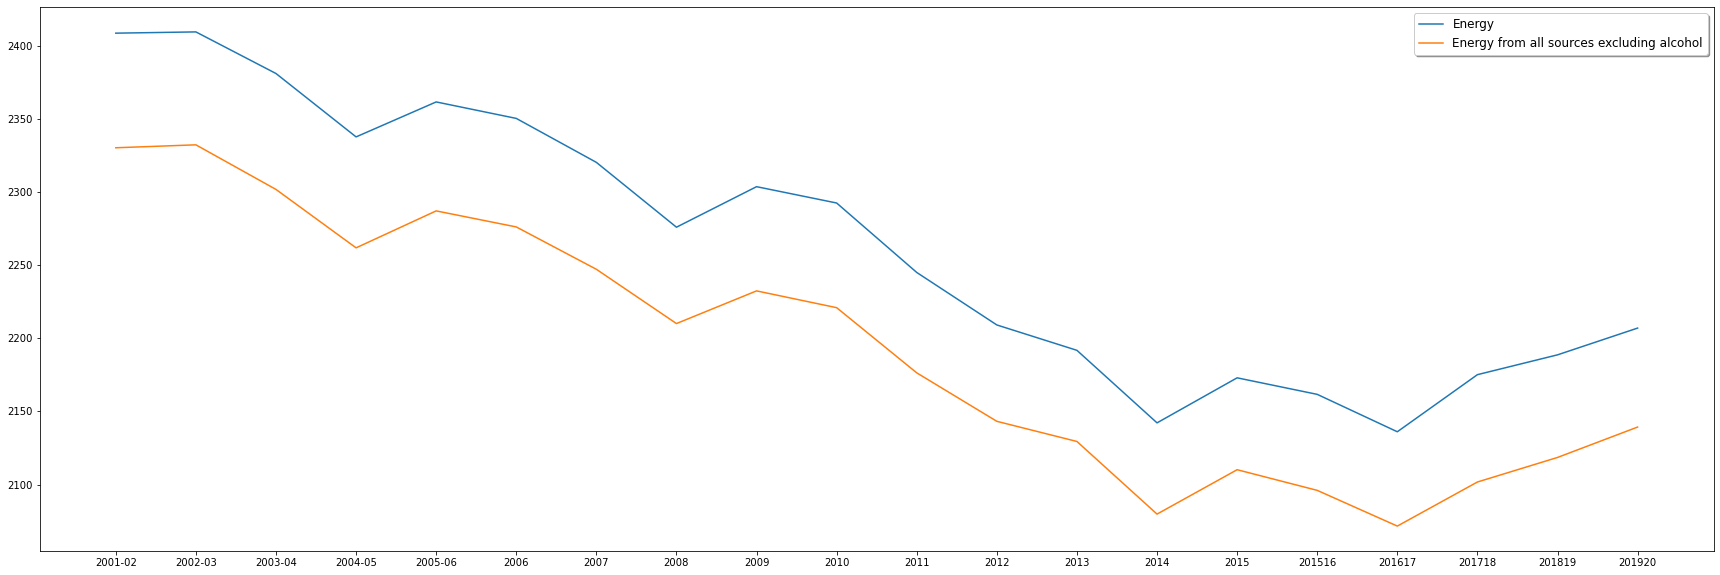

In [18]:
print_tbl(x,energy,energy_label)

On this graph it is funny because the global consumption is decreasing but for alcohol it does not seems to change 

<AxesSubplot:>

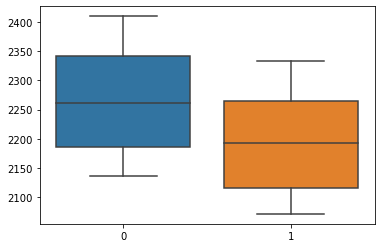

In [19]:
sns.boxplot(data=energy)

#### Plot of g

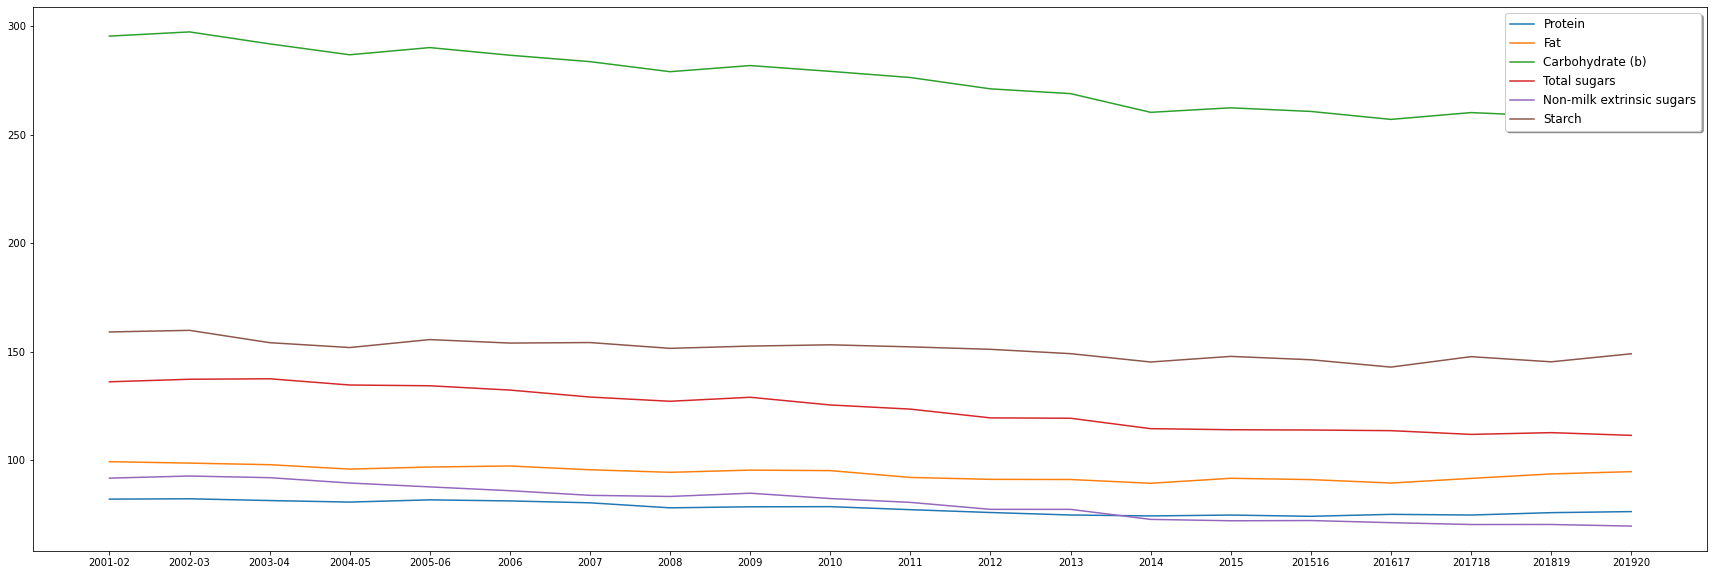

In [20]:
print_tbl(x,hg,hg_label)

<AxesSubplot:>

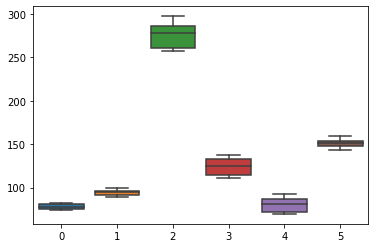

In [21]:
sns.boxplot(data=hg)

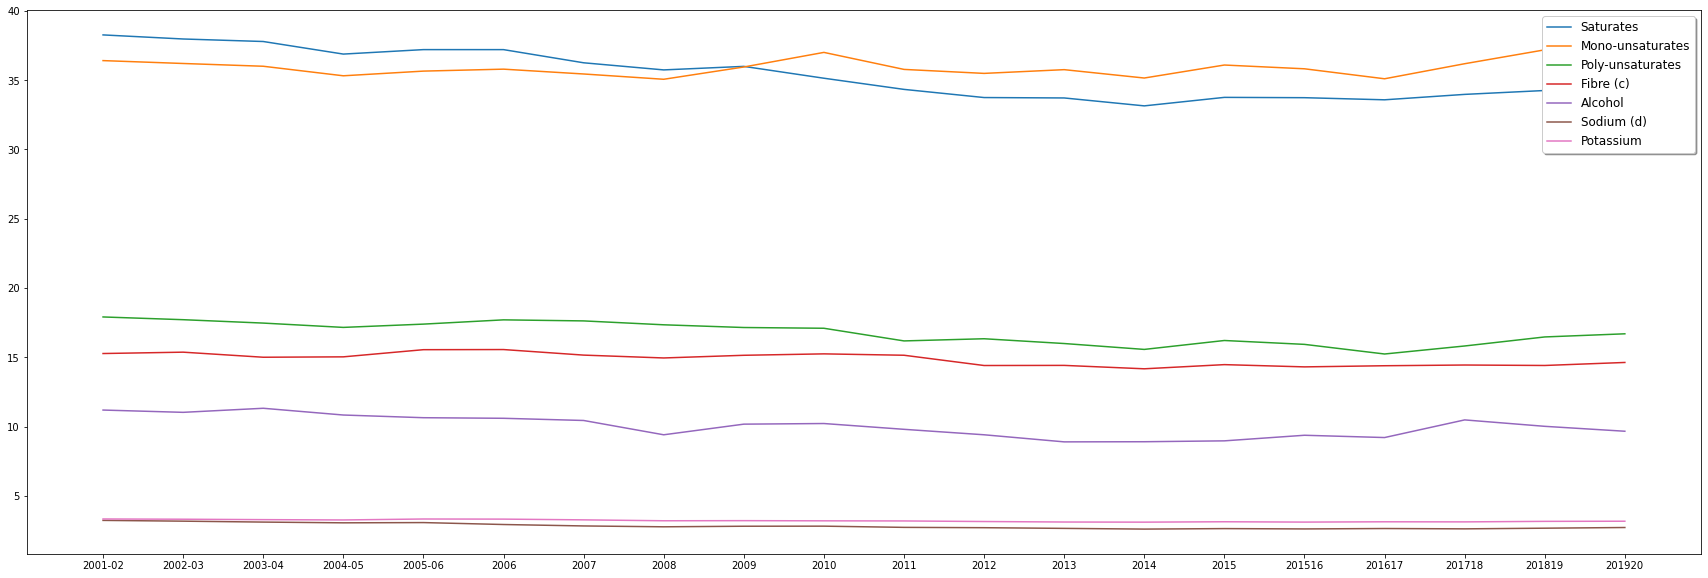

In [22]:
print_tbl(x,lg,lg_label)

<AxesSubplot:>

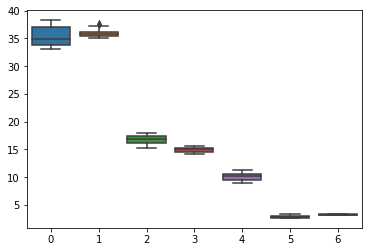

In [23]:
sns.boxplot(data=lg)

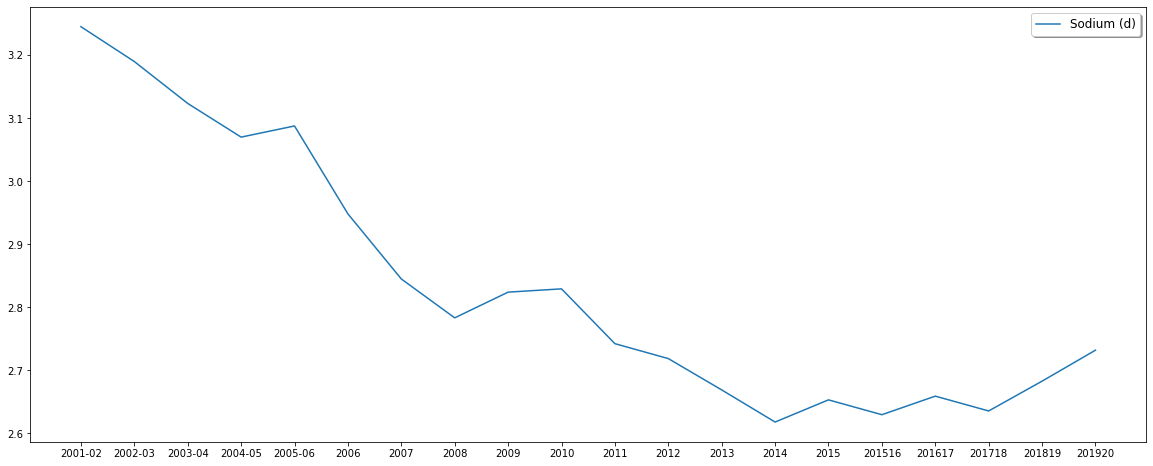

In [24]:
print_one(x,'Sodium (d)')

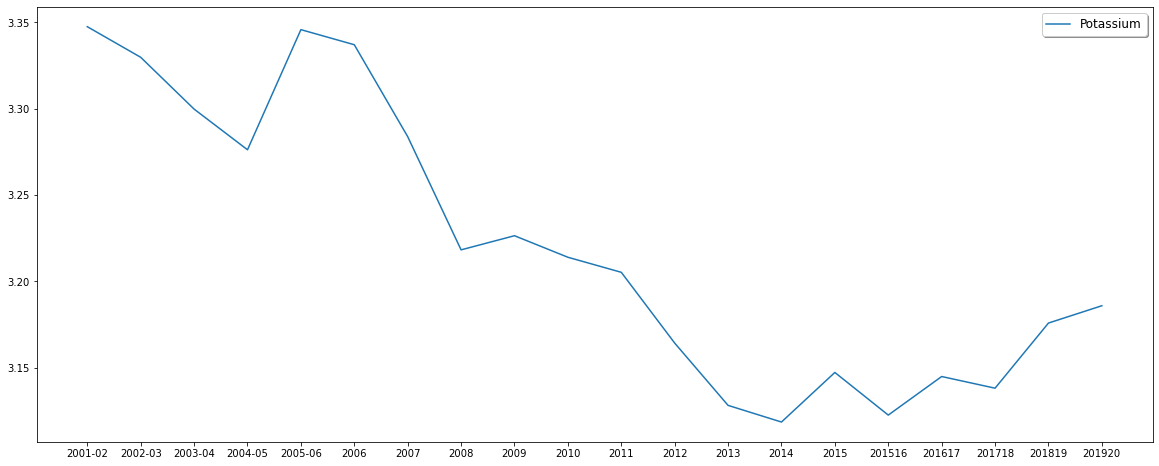

In [25]:
print_one(x,'Potassium')

#### Plot of mg

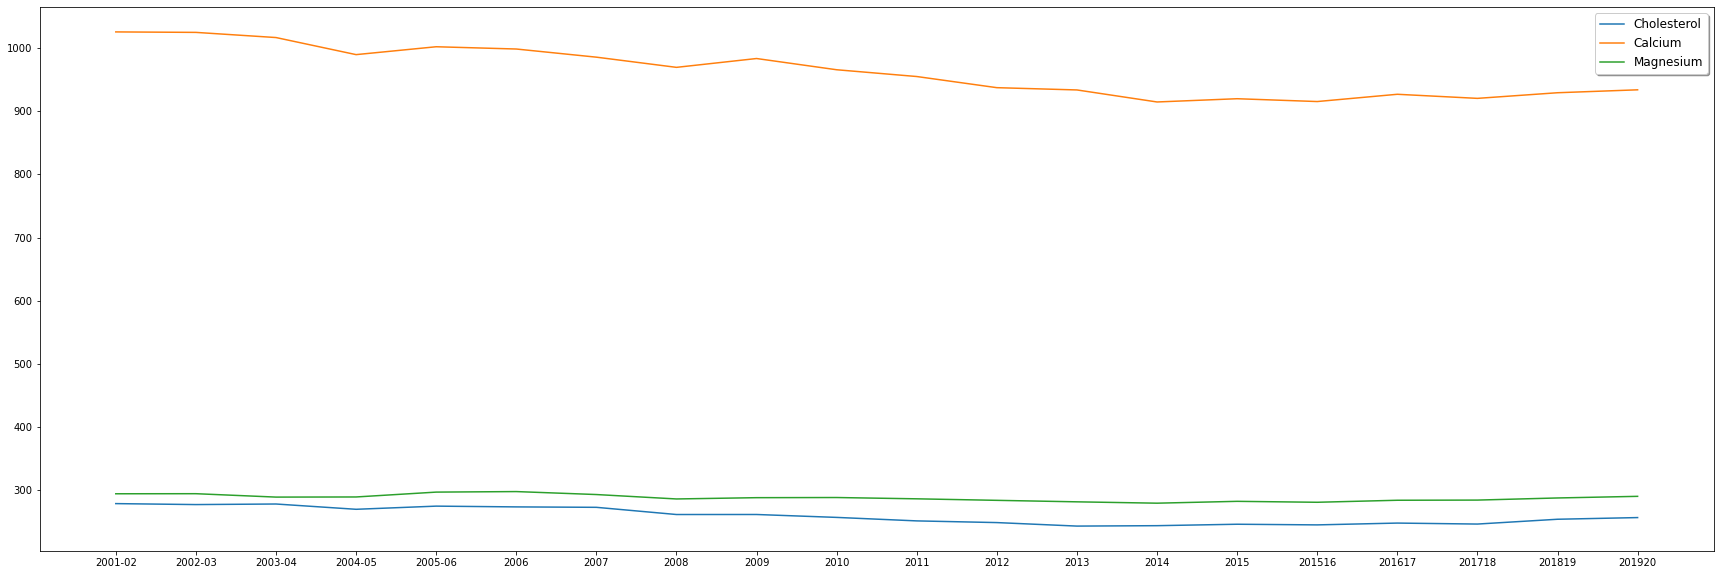

In [26]:
print_tbl(x,hmg,hmg_label)

<AxesSubplot:>

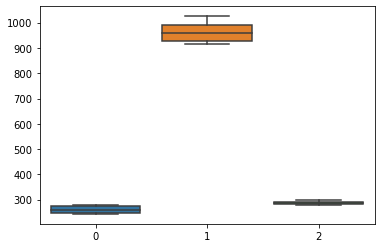

In [27]:
sns.boxplot(data=hmg)

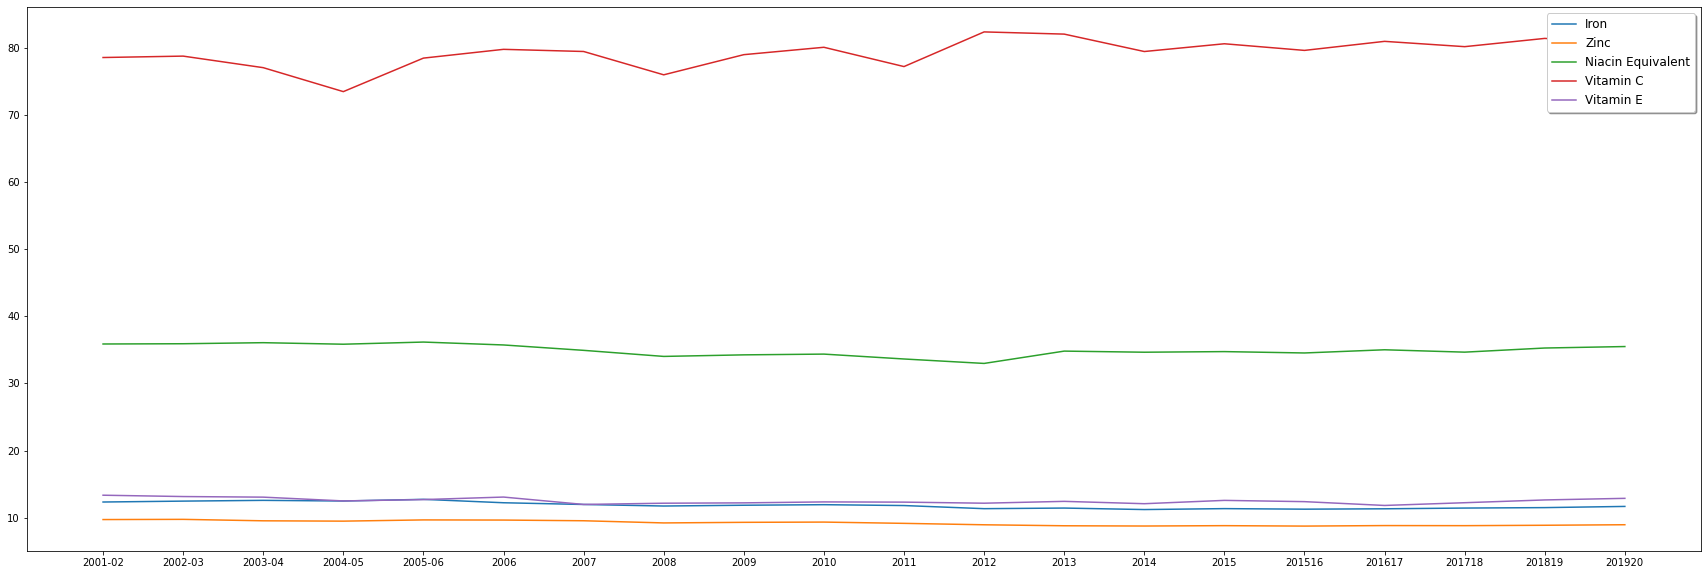

In [28]:
print_tbl(x,mmg,mmg_label)

<AxesSubplot:>

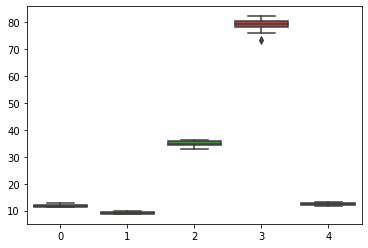

In [29]:
sns.boxplot(data=mmg)

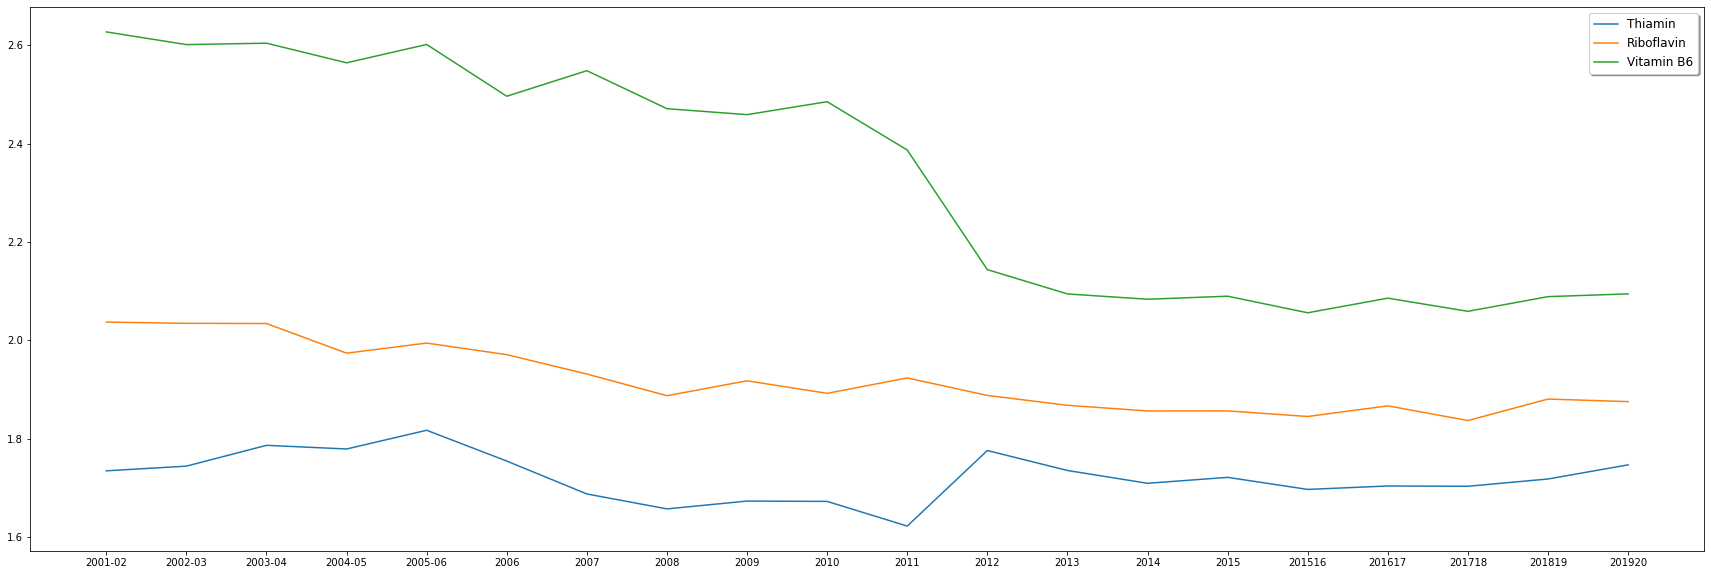

In [30]:
print_tbl(x,lmg,lmg_label)

<AxesSubplot:>

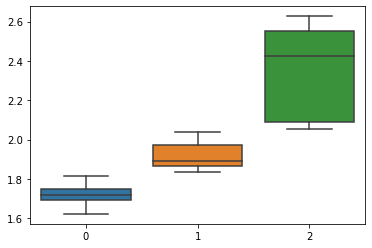

In [31]:
sns.boxplot(data=lmg)

#### Plot of μg	

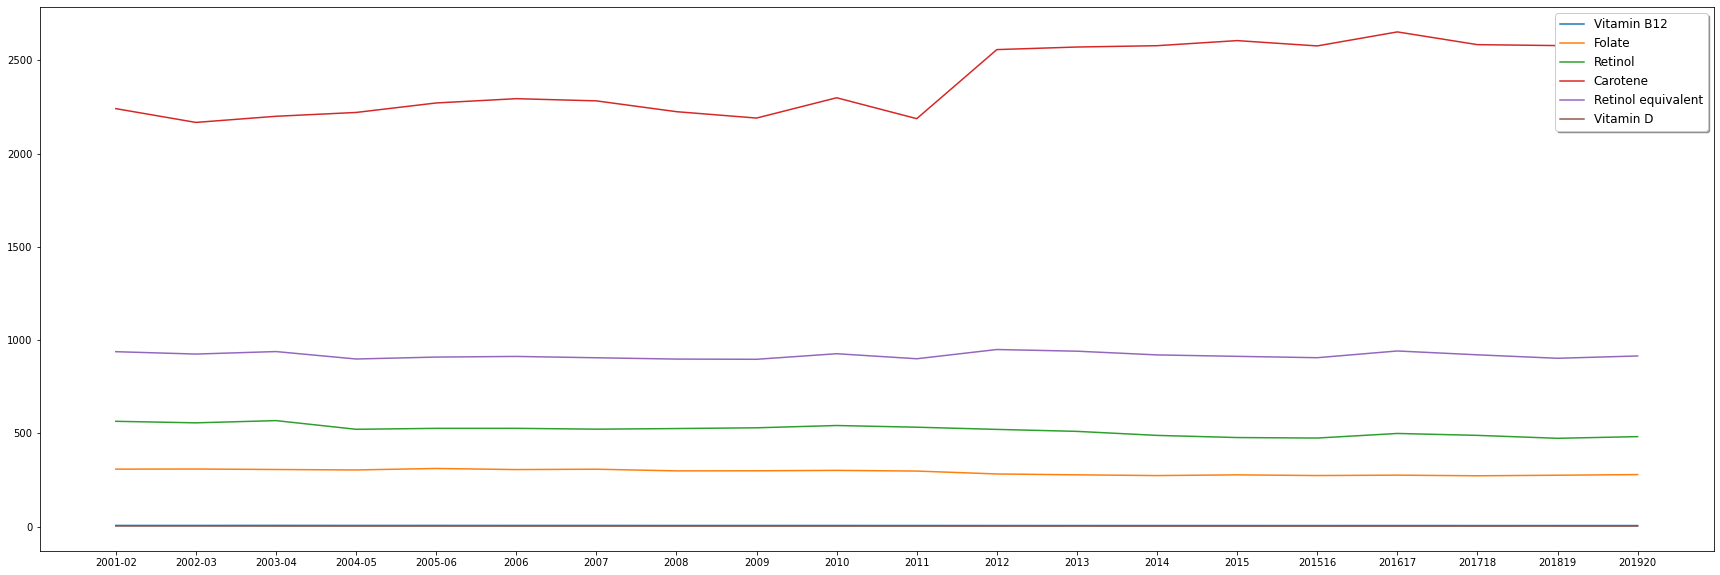

In [32]:
print_tbl(x,microg,microg_label)

<AxesSubplot:>

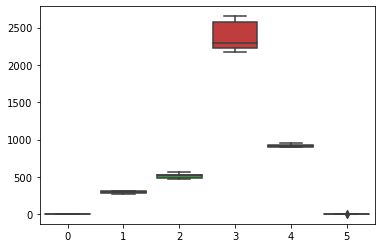

In [33]:
sns.boxplot(data=microg)

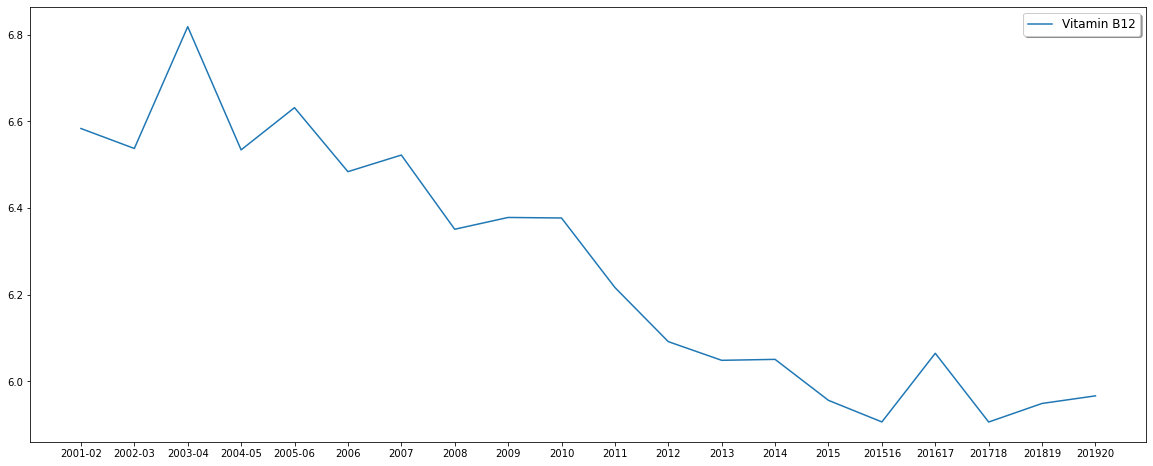

In [34]:
print_one(x,'Vitamin B12')

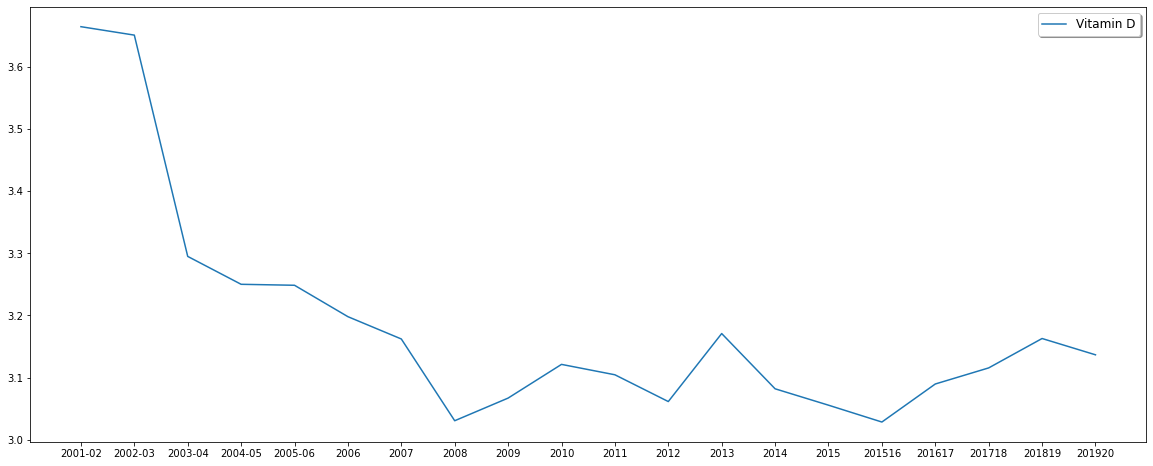

In [35]:
print_one(x,'Vitamin D')

In [36]:
vit_mili=['Vitamin B6','Vitamin C','Vitamin E']
vit_micro=['Vitamin B12','Vitamin D']
table_vit1=create_table(vit_mili)
table_vit2=create_table(vit_micro)

In [37]:
#print_tbl(x,df_standard, df['Description']) #graph too big

### Kmeans on  our dataset

We wish to find clusters of similar data. We want to know if some intakes increase/decrease together, which we could put in groups. The increase or decrease of certain intakes can signify a certain illness or diet habit.

In [38]:
X=df_standard
zscore = StandardScaler().fit(X)
X_z = pd.DataFrame(zscore.transform(X), index=X.index, columns=X.columns)

#### choose the optimum number of clusters

In [39]:
#compute sse and silhouette for number of clusters between 2 and 20
sse = {}
silhouette = {}
for k in range(2,20):
    km = KMeans(k).fit(X_z)
    sse[k] = km.inertia_
    clusters = km.predict(X_z)
    silhouette[k] = silhouette_score(X_z,clusters)
sse_list = pd.Series(sse)
silhouette = pd.Series(silhouette)
k_list = range(2,20)

Text(0, 0.5, 'SSE')

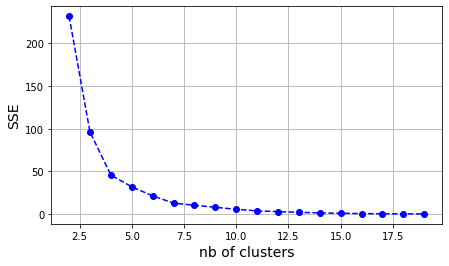

In [40]:
fig = plt.figure(figsize=(7, 4))
plt.plot(k_list,sse_list,'bo--')
plt.grid()
plt.xlabel("nb of clusters",fontsize=14)
plt.ylabel("SSE",fontsize=14)

Text(0.5, 0, 'k')

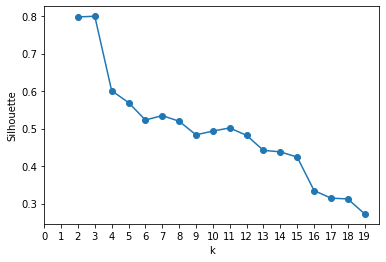

In [41]:
plt.gca().get_xaxis()
plt.gca().xaxis
axes = plt.gca()

plt.plot(range(2,20),silhouette,"o-")
axes.xaxis.set_ticks(range(20))
plt.ylabel("Silhouette")
plt.xlabel('k')

We choose 4 clusters.

#### Train and see our clustering

In [42]:
#train our model
model = KMeans()
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_scale)

<AxesSubplot:xlabel='Description', ylabel='row_0'>

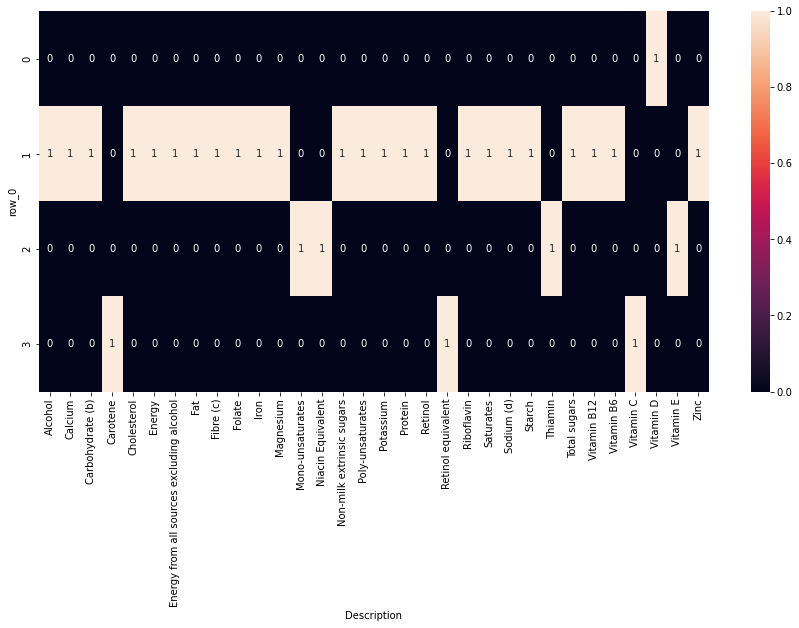

In [43]:
crosstab = pd.crosstab(kmeans.labels_, descrip)
fig, ax = plt.subplots(figsize=(15,7)) 
sns.heatmap(crosstab, annot=True, ax=ax)

In [44]:
years = list(df1.columns)
print(years)

['2001-02', '2002-03', '2003-04', '2004-05', '2005-06', 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 201516, 201617, 201718, 201819, 201920]


We want to study the link between food intake and some illnesses in the UK. We choose to study some of the following illnesses : obesity, heart diseases (and heart attacks), diabetes, iron/vitamin deficiency, and cancer.

#### Observe tendency of each cluster

##### Cluster 0

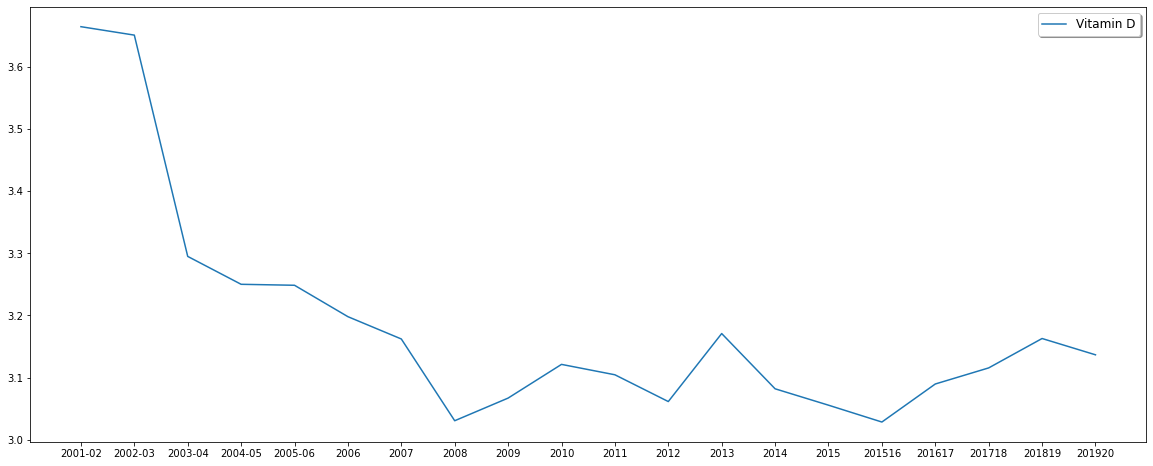

In [45]:
print_one(x,'Vitamin D')

For cluster 0 we can see that the vitamin D intake decreases quickly

Vitamin D is alone in one cluster. It has a very strong decrease, which shows the vitamin D defficiency in the UK since around year 2000. This happened with the mass popularisation of internet and electronics, which influenced people to stay indoors. We can also note that climate change influences people to not go outside.

##### Cluster 1

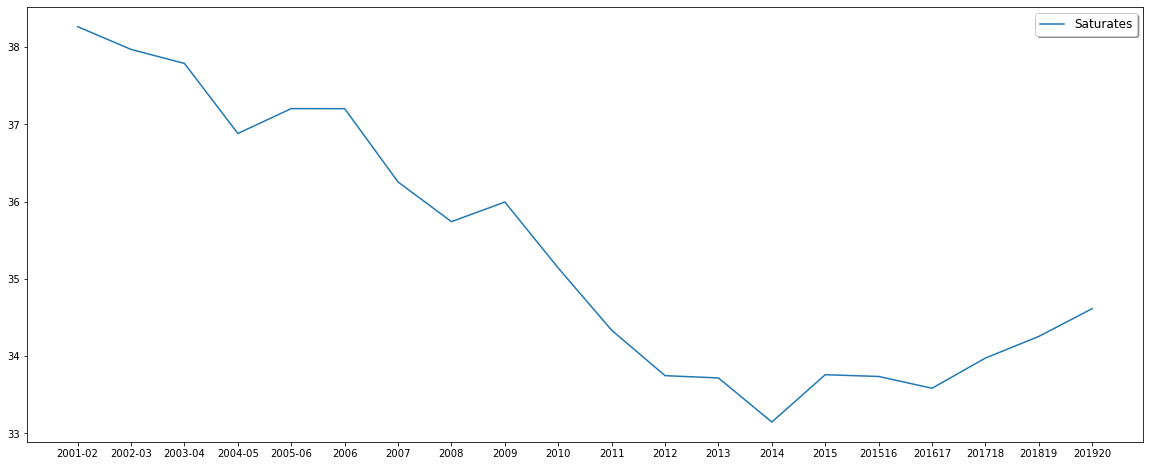

In [46]:
print_one(x,'Saturates')

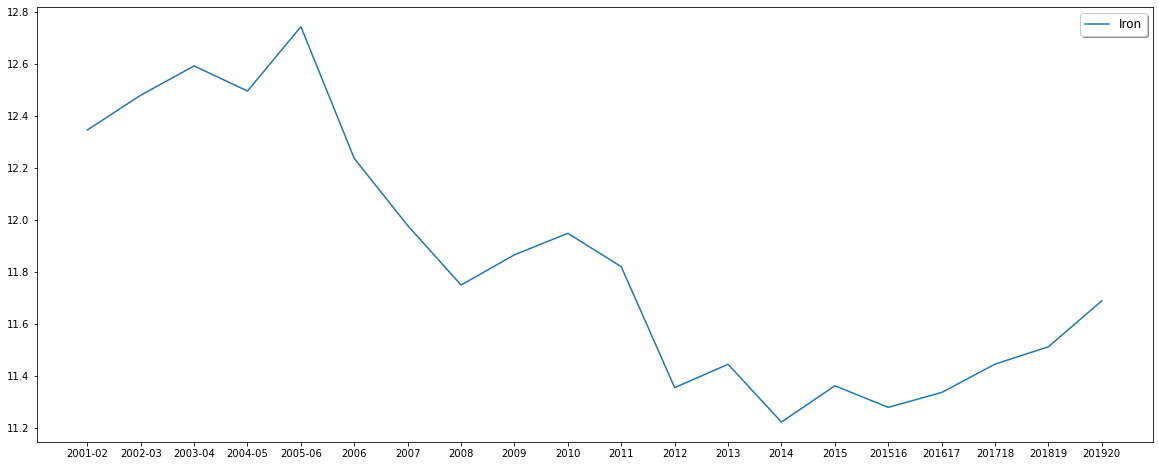

In [47]:
print_one(x,'Iron')

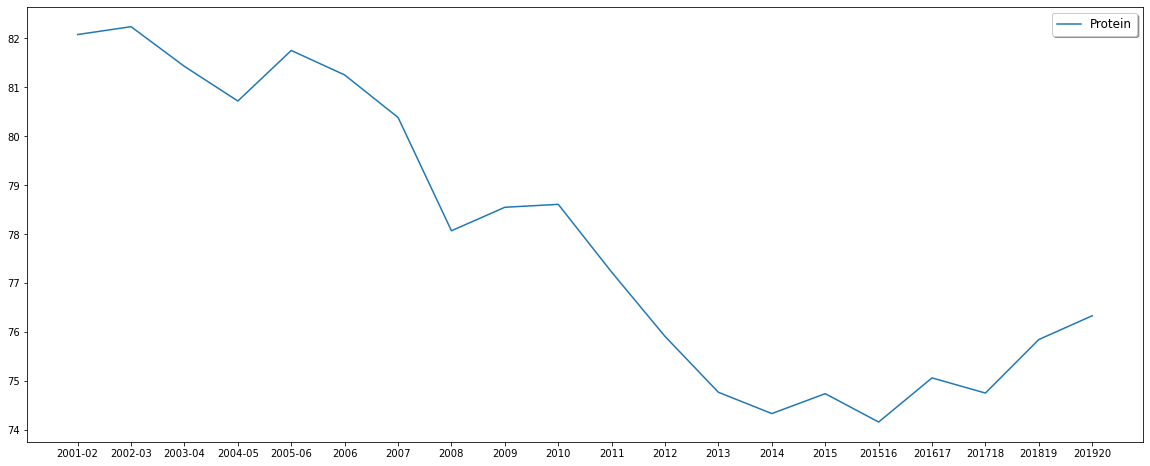

In [48]:
print_one(x,'Protein')

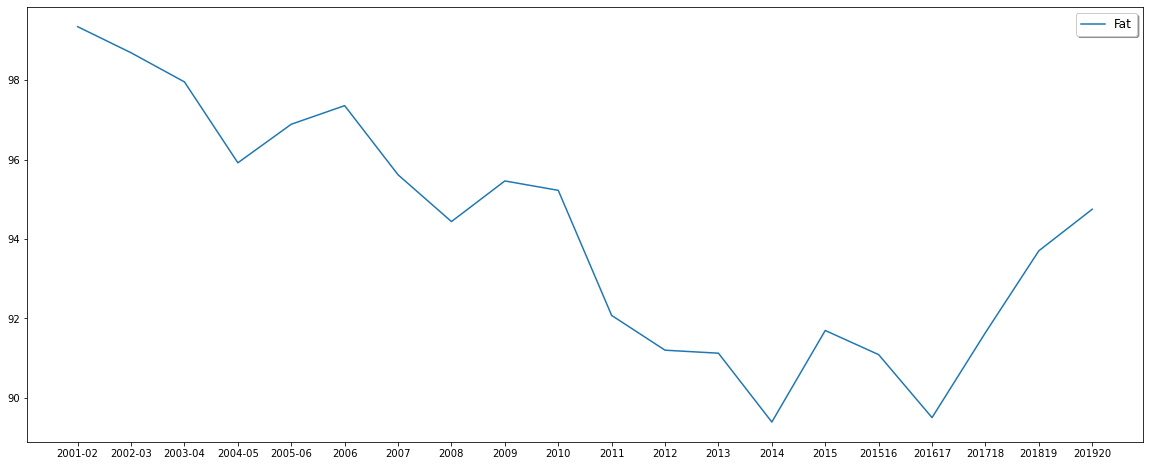

In [49]:
print_one(x,'Fat')

For cluster 1, after some plots of components in cluster 1, we can see that the intakes decrease slowly (slower than vitaminD) and then increase a little since roughly 2015.

This cluster is representative of the current eating habits in the UK. Nowadays, there is an increase in protein, surgars and fats with foods like bacon, soda, snacks, ... These habits are associated with diabetes, obesity, cardiovascular illnesses, some types of cancer, ...

##### Cluster 2

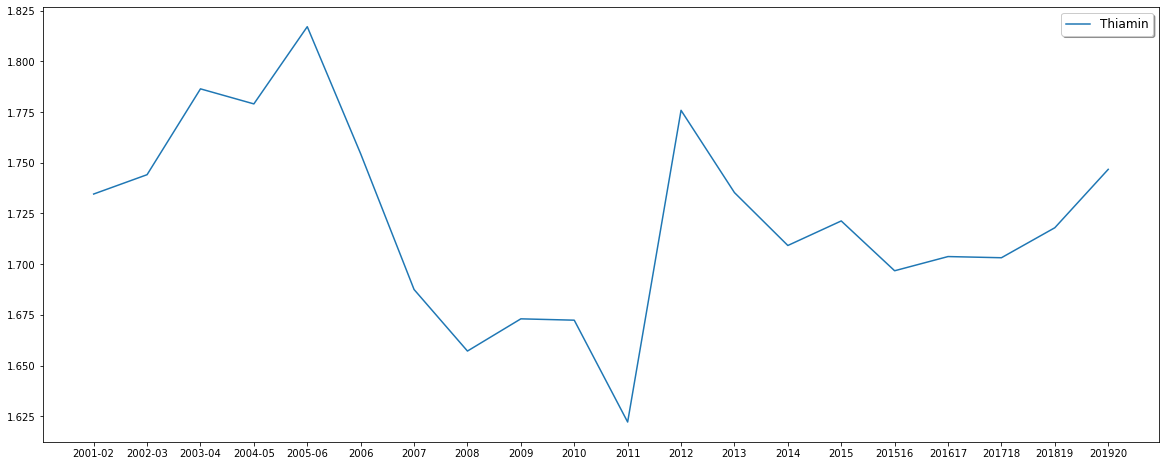

In [50]:
print_one(x,'Thiamin')

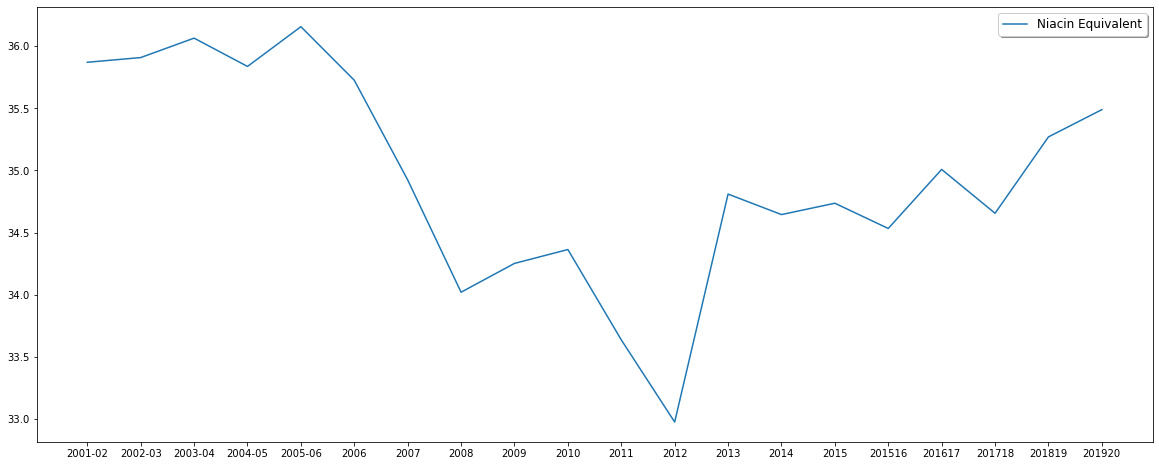

In [51]:
print_one(x,'Niacin Equivalent')

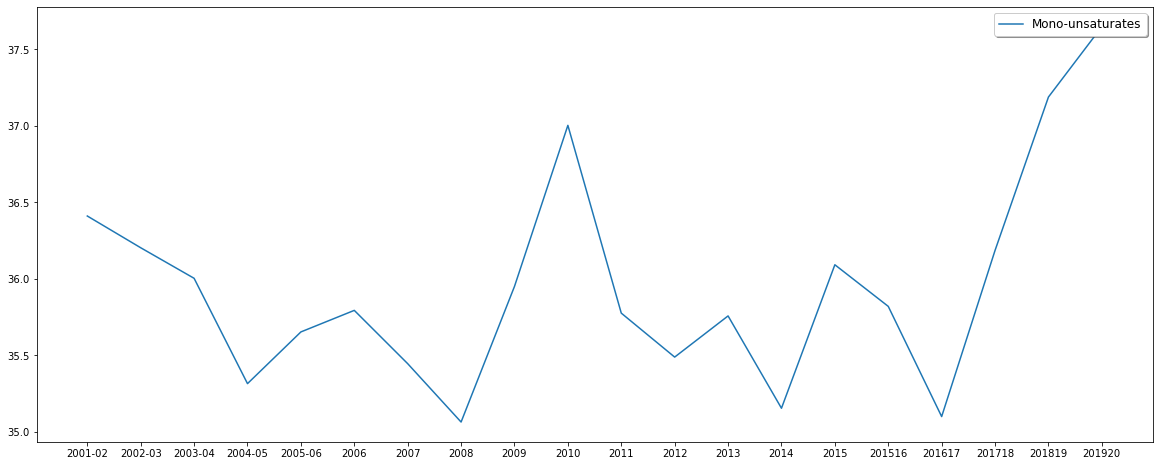

In [52]:
print_one(x,'Mono-unsaturates')

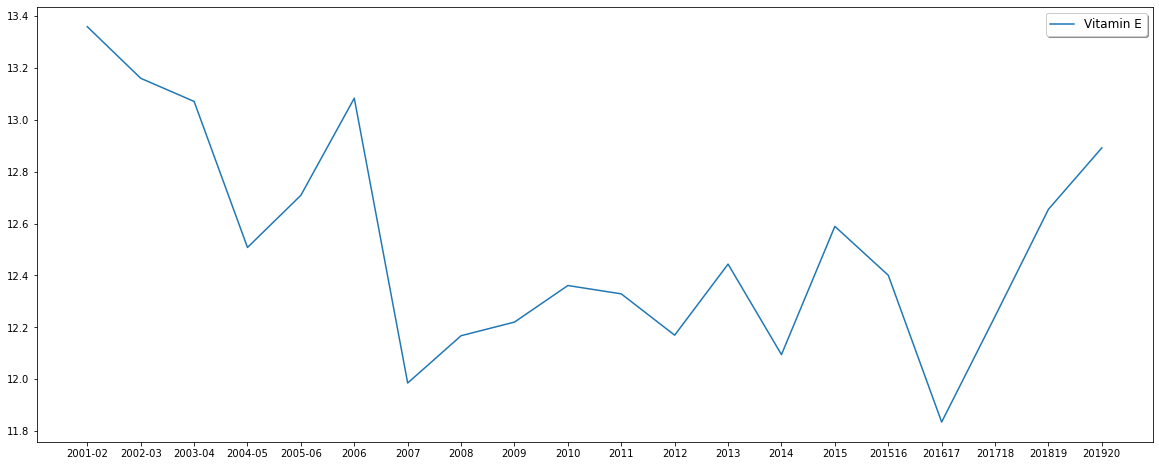

In [61]:
print_one(x,'Vitamin E')

For cluster 2 the intakes fluctuate.

We can not recognize a certain trend for this cluster

##### Cluster 3

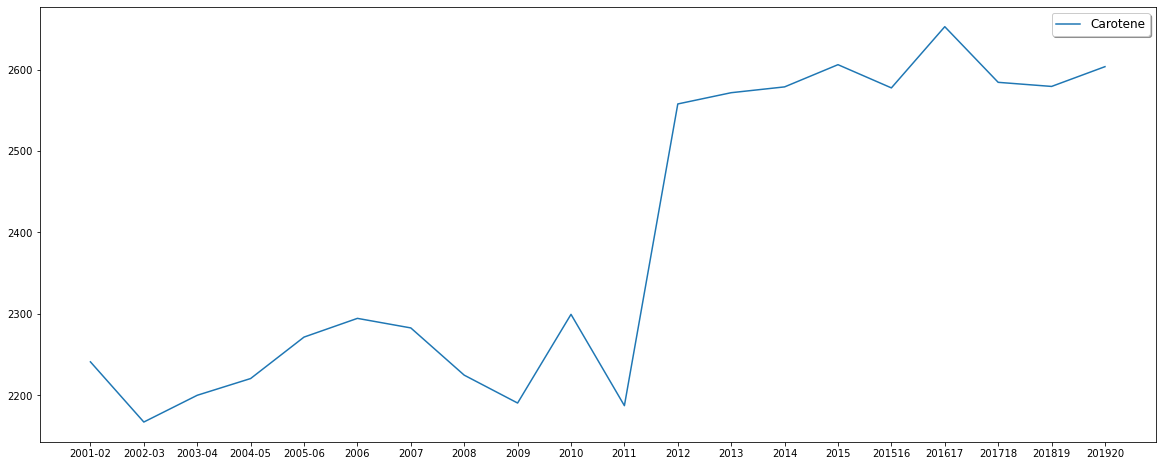

In [53]:
print_one(x,'Carotene')

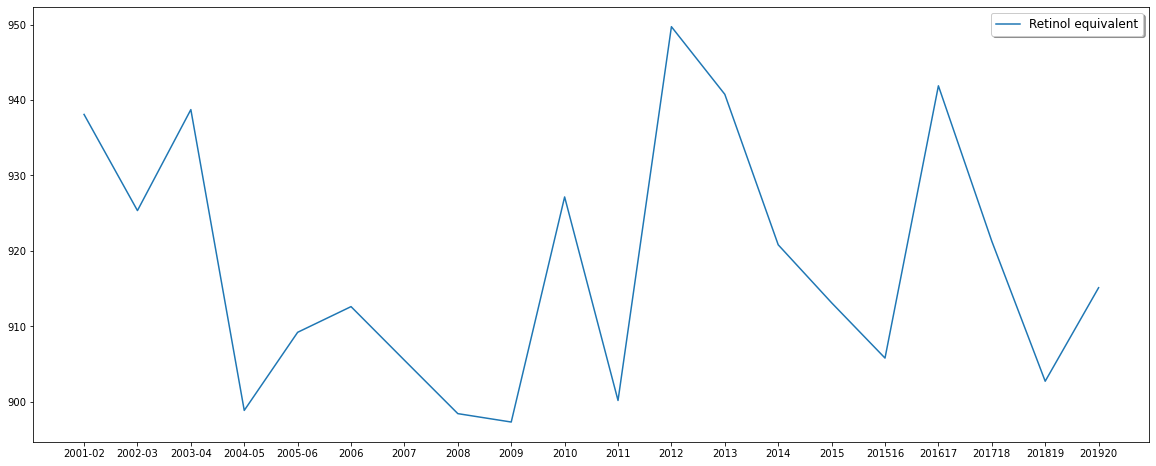

In [54]:
print_one(x,'Retinol equivalent')

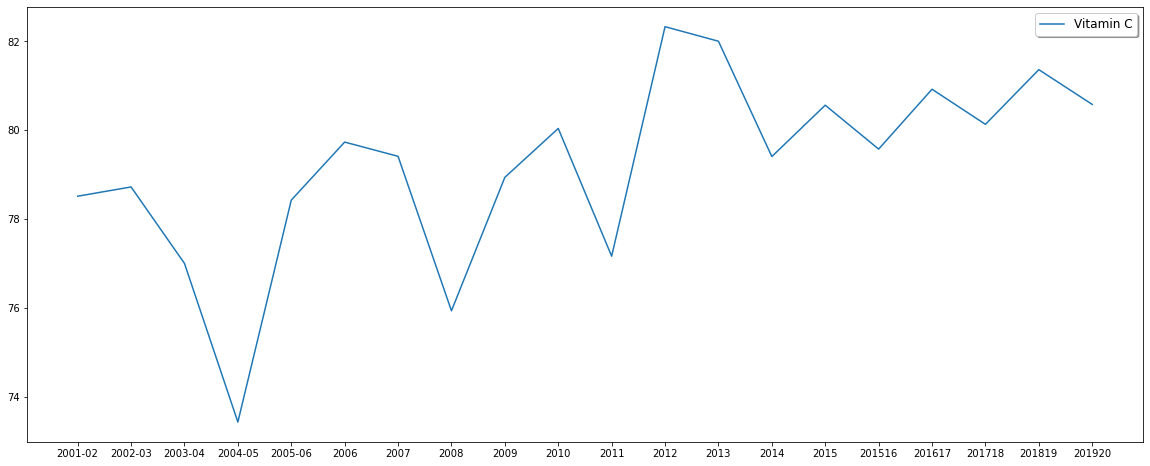

In [55]:
print_one(x,'Vitamin C')

For cluster 3 we can think that the intakes globaly increase with some fluctuations

This cluster represents derived versions of vitamin A and viatmin C. Since these intakes does not correspond to current major diets in the UK, we think these increases come from supplements that are trending for health and beauty reasons.

### PCA analysis

Pca analysis is another way of finding similarity in our data. We can sumarize our data in 2 axis and interpret the positions of the points.

In [56]:
X=df_scale
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
print(pca.explained_variance_ratio_, pca.singular_values_)
#axis 1 explains a bigger portion of our data

[0.58366276 0.1335403 ] [4.24121233 2.02868767]


In [58]:
df = px.data.iris()
features = descrip

pca = PCA()
components = pca.fit_transform(df_scale)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=descrip
    
)
fig.update_traces(diagonal_visible=False)
fig.show()

# source https://plotly.com/python/pca-visualization/

In [59]:
fig = px.scatter(components, x=0, y=1, color=descrip)
fig.show()

The PCA gives a similar result as the clustering. We have a big group of points (similar to cluster 1) and a few isolated points. We have a more visual presentation of our clusters.